In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
!pip install heatmapz

In [3]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

In [4]:
# this code is altered from the following colab:  https://colab.research.google.com/drive/1YSvER-U3cwGplSHyXwaCXYhOWfWO53Iy?pli=1#scrollTo=1cGZYxvlzUL1
data = pd.read_csv('../BM_files/all_listings_df')
data.head()

,id,last_scraped,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city
0,360,2023-09-24,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,...,4.99,4.96,5.00,5.00,5.00,4.91,f,2,2.87,Denver
1,364,2023-09-24,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,...,4.78,4.81,4.95,4.96,4.65,4.71,f,1,0.50,Denver
2,590,2023-09-24,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,...,4.78,4.58,4.93,4.95,4.76,4.85,f,2,4.04,Denver
3,592,2023-09-24,This room is in the basement. It does not hav...,NaN,933,2008-07-21,"Denver, CO",within an hour,100%,95%,...,4.75,4.55,4.94,4.94,4.81,4.86,f,2,0.95,Denver
4,686,2023-09-24,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",990,2008-07-23,"Denver, CO",within a few hours,100%,100%,...,4.75,4.80,4.86,4.91,4.87,4.81,f,2,1.39,Denver


In [5]:
# cleaning I think that the availability columns should be percents
data.loc[:, 'avail_30_percent'] = round((data['availability_30'] / 30 *100), 1)
data.loc[:, 'avail_60_percent'] = round((data['availability_60'] / 60 *100), 1)
data.loc[:, 'avail_90_percent'] = round((data['availability_90'] / 90 *100), 1)
data.loc[:, 'avail_365_percent'] = round((data['availability_365'] / 365 *100), 1)


data.head()

,id,last_scraped,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city,avail_30_percent,avail_60_percent,avail_90_percent,avail_365_percent
0,360,2023-09-24,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,...,5.00,4.91,f,2,2.87,Denver,13.3,45.0,63.3,40.3
1,364,2023-09-24,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,...,4.65,4.71,f,1,0.50,Denver,76.7,88.3,92.2,98.1
2,590,2023-09-24,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,...,4.76,4.85,f,2,4.04,Denver,16.7,45.0,58.9,63.8
3,592,2023-09-24,This room is in the basement. It does not hav...,NaN,933,2008-07-21,"Denver, CO",within an hour,100%,95%,...,4.81,4.86,f,2,0.95,Denver,0.0,0.0,0.0,43.3
4,686,2023-09-24,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",990,2008-07-23,"Denver, CO",within a few hours,100%,100%,...,4.87,4.81,f,2,1.39,Denver,0.0,0.0,14.4,78.9


In [6]:

# Sticking the overall rating on a five point scale too 
data.loc[:, 'overall_rating_percent'] = round((data['review_scores_rating'] / 5 *100), 1)
data.loc[:, 'accuracy_rating_percent'] = round((data['review_scores_accuracy'] / 5 *100), 1)
data.loc[:, 'cleanliness_rating_percent'] = round((data['review_scores_cleanliness'] / 5 *100), 1)
data.loc[:, 'checkin_rating_percent'] = round((data['review_scores_checkin'] / 5 *100), 1)
data.loc[:, 'communication_rating_percent'] = round((data['review_scores_communication'] / 5 *100), 1)
data.loc[:, 'location_rating_percent'] = round((data['review_scores_location'] / 5 *100), 1)
data.loc[:, 'value_rating_percent'] = round((data['review_scores_value'] / 5 *100), 1)

data.head()

,id,last_scraped,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,avail_60_percent,avail_90_percent,avail_365_percent,overall_rating_percent,accuracy_rating_percent,cleanliness_rating_percent,checkin_rating_percent,communication_rating_percent,location_rating_percent,value_rating_percent
0,360,2023-09-24,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,...,45.0,63.3,40.3,99.8,99.8,99.2,100.0,100.0,100.0,98.2
1,364,2023-09-24,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,...,88.3,92.2,98.1,97.0,95.6,96.2,99.0,99.2,93.0,94.2
2,590,2023-09-24,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,...,45.0,58.9,63.8,97.0,95.6,91.6,98.6,99.0,95.2,97.0
3,592,2023-09-24,This room is in the basement. It does not hav...,NaN,933,2008-07-21,"Denver, CO",within an hour,100%,95%,...,0.0,0.0,43.3,97.4,95.0,91.0,98.8,98.8,96.2,97.2
4,686,2023-09-24,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",990,2008-07-23,"Denver, CO",within a few hours,100%,100%,...,0.0,14.4,78.9,95.2,95.0,96.0,97.2,98.2,97.4,96.2


In [7]:
# converting availability and bookable to int type data this basicaly maps t to 1 
# and f to 0 the next line is me practicing replacing 
data['has_availability_recode'] = data['has_availability'].map({'t': 1, 'f': 0})
data['instant_bookable_recode'] = data['instant_bookable'].map({'t': 1, 'f': 0})

# If you want 1 for True and 2 for False
data['has_availability_recode'] = data['has_availability'].replace({'t': 1, 'f': 2})
data['instant_bookable_recode'] = data['instant_bookable'].replace({'t': 1, 'f': 2})

# Calculate percentage distribution
percentage_availibility = data['has_availability_recode'].value_counts(normalize=True) * 100
percentage_bookable = data['instant_bookable_recode'].value_counts(normalize=True) * 100

# Convert to float
data['has_availability_recode'] = data['has_availability_recode'].astype(float)
data['instant_bookable_recode'] = data['instant_bookable_recode'].astype(float)

print(percentage_availibility, percentage_bookable)

has_availability_recode
1    98.328301
2     1.671699
Name: proportion, dtype: float64 instant_bookable_recode
2    66.334077
1    33.665923
Name: proportion, dtype: float64


In [9]:
# Taking out the uncorrelated variables to reduce the number of variables keeping price
# Thinking about renaming the variables to something more useful


var_cor_2_names = [
    "overall_rating_percent", 
    "accuracy_rating_percent" ,
    "value_rating_percent", 
    "communication_rating_percent",
    "cleanliness_rating_percent", 
    "checkin_rating_percent", 
    "location_rating_percent", 
    "price",
    "avail_30_percent", 
    "avail_60_percent", 
    "avail_90_percent", 
    "avail_365_percent"
]

# Naming it silly because I worked way to long at this to get it to work and 
# I was being silly
var_cor_small_df_silly = data[var_cor_2_names]
# var_cor_small_df


var_cor_small_df = var_cor_small_df_silly.rename(columns={
    'overall_rating_percent': 'Overall Satisfaction: Survey', 
    'accuracy_rating_percent': 'Accuracy of Listing: Survey',
    'cleanliness_rating_percent': 'Cleanliness of Listing: Survey',
    'checkin_rating_percent': 'Checkin Process: Survey',
    'communication_rating_percent': 'Communication about Listing: Survey',
    'location_rating_percent': 'Location of Listing: Survey',
    'value_rating_percent': 'Value for Money: Survey',
    'price': 'Price',      
    'avail_30_percent': 'Percent Listing Available 30 days out', 
    'avail_60_percent': 'Percent Listing Available 60 days out',
    'avail_90_percent': 'Percent Listing Available 90 days out', 
    'avail_365_percent': 'Percent Listing Available 365 days out'
    })

var_cor_small_df

,Overall Satisfaction: Survey,Accuracy of Listing: Survey,Value for Money: Survey,Communication about Listing: Survey,Cleanliness of Listing: Survey,Checkin Process: Survey,Location of Listing: Survey,Price,Percent Listing Available 30 days out,Percent Listing Available 60 days out,Percent Listing Available 90 days out,Percent Listing Available 365 days out
0,99.8,99.8,98.2,100.0,99.2,100.0,100.0,90.0,13.3,45.0,63.3,40.3
1,97.0,95.6,94.2,99.2,96.2,99.0,93.0,179.0,76.7,88.3,92.2,98.1
2,97.0,95.6,97.0,99.0,91.6,98.6,95.2,64.0,16.7,45.0,58.9,63.8
3,97.4,95.0,97.2,98.8,91.0,98.8,96.2,57.0,0.0,0.0,0.0,43.3
4,95.2,95.0,96.2,98.2,96.0,97.2,97.4,33.0,0.0,0.0,14.4,78.9
...,...,...,...,...,...,...,...,...,...,...,...,...
22846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.0,100.0,100.0,100.0,100.0
22847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,6.7,3.3,2.2,0.5
22848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.0,53.3,76.7,84.4,70.1
22849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.0,96.7,98.3,98.9,73.7


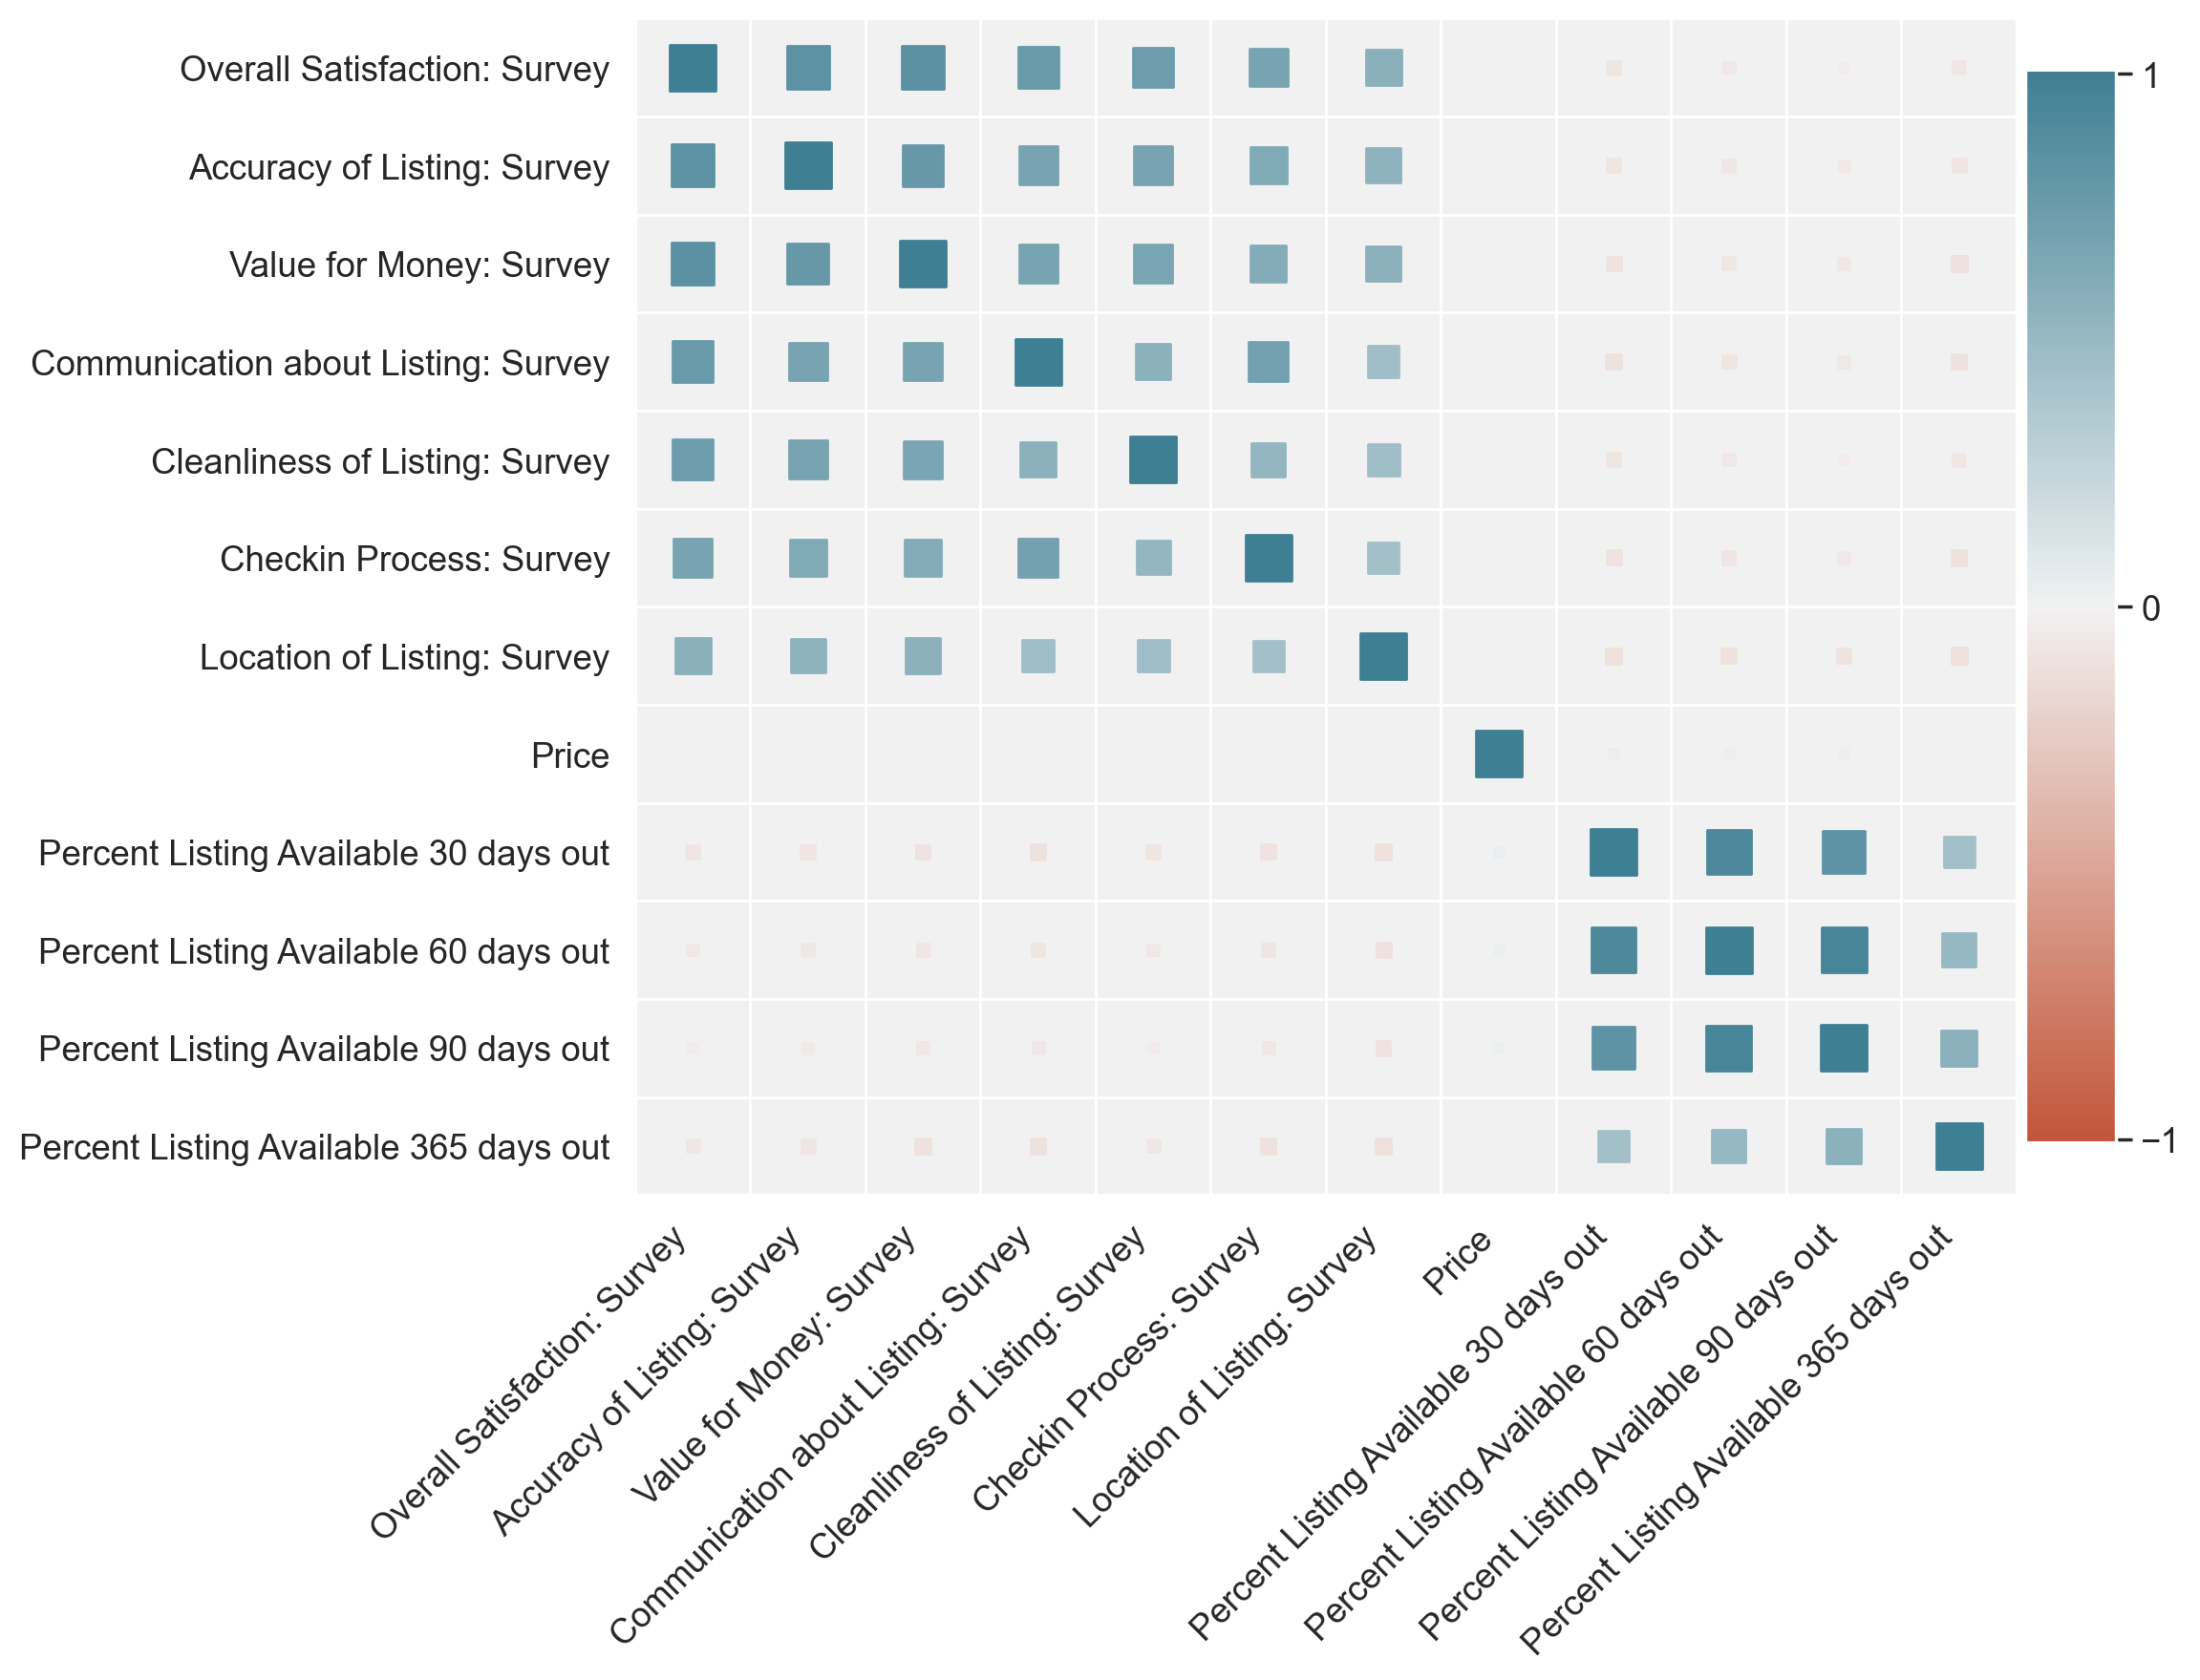

In [13]:
# This is to be in the slide deck 
fig = plt.figure(figsize=(10, 8))
corrplot(var_cor_small_df.corr(), size_scale=300);
fig.savefig("Correlation_graph.png")